## Putting the code into a method

In [32]:
import matplotlib
import PIL
import scipy
from matplotlib import image as img
%matplotlib inline 
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from scipy.cluster.vq import whiten
from scipy.cluster.vq import kmeans 

### importing image

In [33]:
my_image = img.imread('colors.jpg')
my_image.shape

(540, 1284, 3)

## displaying an image

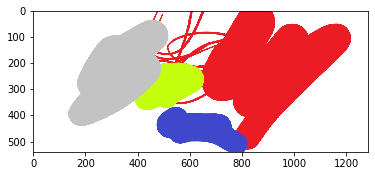

In [34]:
plt.imshow(my_image)
plt.show()

##  In the process of finding out the dominant colors of an image, we are not concerned about the position of the pixel. Hence, we need to convert the M x N x 3 matrix to three individual lists, which contain the respective red, blue and green values.

In [35]:
r = []
g = []
b = []
for line in image:
    for pixel in line:
        temp_r, temp_g, temp_b = pixel
        r.append(temp_r)
        g.append(temp_g)
        b.append(temp_b)
        
df = pd.DataFrame({'red': r,'blue': b, 'green': g})
df['scaled_red'] = whiten(df['red'])
df['scaled_blue'] = whiten(df['blue'])
df['scaled_green'] = whiten(df['green'])

In [36]:
def get_colors(image, number_of_colors):
    
    my_image = img.imread(image)
    r = []
    g = []
    b = []
    for line in my_image:
        for pixel in line:
            temp_r, temp_g, temp_b = pixel
            r.append(temp_r)
            g.append(temp_g)
            b.append(temp_b)
        
    df = pd.DataFrame({'red': r,'blue': b, 'green': g})
    df['scaled_red'] = whiten(df['red'])
    df['scaled_blue'] = whiten(df['blue'])
    df['scaled_green'] = whiten(df['green'])
    
    
    
    cluster_centers, distortion = kmeans(df[['scaled_red', 'scaled_green', 'scaled_blue']], number_of_colors)
    
    
    colors = []
    r_std, g_std, b_std = df[['red', 'green', 'blue']].std()
    for cluster_center in cluster_centers:
        scaled_r, scaled_g, scaled_b = cluster_center
        colors.append((
        scaled_r * r_std / 255,
        scaled_g * g_std / 255,
        scaled_b * b_std / 255))
        print(colors)
    plt.imshow([colors])
    plt.show()

[(0.9198507646516485, 0.11250601899849354, 0.1438896209549303)]
[(0.9198507646516485, 0.11250601899849354, 0.1438896209549303), (0.7672204515665524, 0.8189995247106979, 0.5930887354389116)]
[(0.9198507646516485, 0.11250601899849354, 0.1438896209549303), (0.7672204515665524, 0.8189995247106979, 0.5930887354389116), (0.24886901479854098, 0.2794097411611272, 0.7987645169038172)]
[(0.9198507646516485, 0.11250601899849354, 0.1438896209549303), (0.7672204515665524, 0.8189995247106979, 0.5930887354389116), (0.24886901479854098, 0.2794097411611272, 0.7987645169038172), (0.9987338864717442, 0.9979935202303961, 0.9975170656990769)]


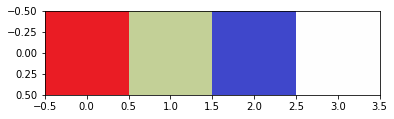

In [30]:
get_colors('colors.jpg',5)

In [37]:
get_colors('Daniel1.jpg',5)

KeyboardInterrupt: 